## Finalidad y función
Debajo se encuentra  la tabla de informaciones sobre la finalidad y función de cada item presupuestario.
Cada finalidad tiene un id (finalidad_id) y cada función también (funcion_id)

In [2]:
import pandas as pd

finalidad_funcion_2019 = pd.read_csv('./data/2019/d-finalidad-funcion-2019.csv')
finalidad_funcion_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ejercicio_presupuestario    29 non-null     int64 
 1   finalidad_id                29 non-null     int64 
 2   finalidad_desc              29 non-null     object
 3   funcion_id                  29 non-null     int64 
 4   funcion_desc                29 non-null     object
 5   ultima_actualizacion_fecha  29 non-null     object
dtypes: int64(3), object(3)
memory usage: 1.5+ KB


Hay dos funciones que nos interesan:
- Educación y Cultura
- Ciencia y Técnica

Ambas se encuentran dentro de la funcion "SERVICIOS_SOCIALES" (finalidad_id = 3)

In [3]:
ff_19 = finalidad_funcion_2019 # sólo un alias para no escribir tanto
servicios_sociales = finalidad_funcion_2019[ff_19["finalidad_desc"]=="SERVICIOS SOCIALES"]
servicios_sociales

,ejercicio_presupuestario,finalidad_id,finalidad_desc,funcion_id,funcion_desc,ultima_actualizacion_fecha
12,2019,3,SERVICIOS SOCIALES,1,Salud,Última actualización del ejercicio 2019: 26 Ju...
13,2019,3,SERVICIOS SOCIALES,2,Promoción y Asistencia Social,Última actualización del ejercicio 2019: 26 Ju...
14,2019,3,SERVICIOS SOCIALES,3,Seguridad Social,Última actualización del ejercicio 2019: 26 Ju...
15,2019,3,SERVICIOS SOCIALES,4,Educación y Cultura,Última actualización del ejercicio 2019: 26 Ju...
16,2019,3,SERVICIOS SOCIALES,5,Ciencia y Técnica,Última actualización del ejercicio 2019: 26 Ju...
17,2019,3,SERVICIOS SOCIALES,6,Trabajo,Última actualización del ejercicio 2019: 26 Ju...
18,2019,3,SERVICIOS SOCIALES,7,Vivienda y Urbanismo,Última actualización del ejercicio 2019: 26 Ju...
19,2019,3,SERVICIOS SOCIALES,8,Agua Potable y Alcantarillado,Última actualización del ejercicio 2019: 26 Ju...



Nótese la composición de los identificadores. En primer lugar se encuentra el 'ejercicio_presupuestario', luego 'finalidad_id' finalmente 'funcion_id'; Cada uno se repite, pero juntos generan un id único. 

Por lo tanto, podemos intentar definir identificador "universal" de un de una función cómo su `<<ejercicio_presupuestario>>.<<finalidad_id>>.<<funcion_id>>`

In [4]:
servicios_sociales[["ejercicio_presupuestario", "finalidad_id", "funcion_id", "funcion_desc"]]

,ejercicio_presupuestario,finalidad_id,funcion_id,funcion_desc
12,2019,3,1,Salud
13,2019,3,2,Promoción y Asistencia Social
14,2019,3,3,Seguridad Social
15,2019,3,4,Educación y Cultura
16,2019,3,5,Ciencia y Técnica
17,2019,3,6,Trabajo
18,2019,3,7,Vivienda y Urbanismo
19,2019,3,8,Agua Potable y Alcantarillado


### Extracción de identificadores

In [5]:
from DescripcionPorFuncion import extraerDescripcion, generarIdentificadorUniversal, generarCodigoFinalidadFuncion


#### Educación y Cultura

In [6]:
ss = servicios_sociales
educacion_cultura = servicios_sociales[ss["funcion_desc"] == "Educación y Cultura"]
educacion_cultura


,ejercicio_presupuestario,finalidad_id,finalidad_desc,funcion_id,funcion_desc,ultima_actualizacion_fecha
15,2019,3,SERVICIOS SOCIALES,4,Educación y Cultura,Última actualización del ejercicio 2019: 26 Ju...


In [7]:
desc_educacion_cultura = extraerDescripcion(educacion_cultura)
idUniversal = generarIdentificadorUniversal(desc_educacion_cultura)
print(idUniversal)


2019.3.4


#### Ciencia y Técnica

In [8]:
ss = servicios_sociales
ciencia_tecnica = servicios_sociales[ss["funcion_desc"]=="Ciencia y Técnica"]
ciencia_tecnica

,ejercicio_presupuestario,finalidad_id,finalidad_desc,funcion_id,funcion_desc,ultima_actualizacion_fecha
16,2019,3,SERVICIOS SOCIALES,5,Ciencia y Técnica,Última actualización del ejercicio 2019: 26 Ju...


In [9]:
desc_ciencia_tecnica = extraerDescripcion(ciencia_tecnica)
generarIdentificadorUniversal(desc_ciencia_tecnica)

'2019.3.5'

## Inversión neta del presupuesto 2019 en 'Educación y Cultura'

### Investigación del documento *"Proyecto de Ley de Presupuesto Finalidad Función 2019"*

Observese que en el documento "Proyecto de Ley de Presupuesto Finalidad Función 2019" (pc-proy19-finfun.csv) se utiliza cómo *"código de finalidad funcion"* para identificar ele elemento for finalidad y función, ambos identificadores se funcionan en uno ***'finalidad-función'***

In [10]:
presupuesto_2019 = pd.read_csv('./data/2019/pc-proy19-finfun.csv', encoding="ISO-8859-1")
presupuesto_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Código de  Jurisdicción           231 non-null    int64  
 1   Descripción de  Jurisdicción      231 non-null    object 
 2   Código de  Subjurisdicción        231 non-null    int64  
 3   Descripción de  Subjurisdicción   231 non-null    object 
 4   Código de  Entidad                231 non-null    int64  
 5   Descripción de  Entidad           231 non-null    object 
 6   Código de Finalidad Función       231 non-null    float64
 7   Descripción de Finalidad Función  231 non-null    object 
 8   Crédito 2019                      231 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 16.4+ KB


In [11]:
codigos_finalidad_funcion = presupuesto_2019["Código de Finalidad Función"]
codigos_finalidad_funcion

0      1.1
1      3.1
2      1.2
3      3.4
4      1.7
      ... 
226    4.6
227    3.7
228    3.8
229    4.8
230    9.9
Name: Código de Finalidad Función, Length: 231, dtype: float64

#### Código de Finalidad Función

1. ¿Cuantos códigos hay? (no únicos)

In [12]:
# index = pd.Index(codigos_finalidad_funcion)
# index
codigos_finalidad_funcion.size

231

2. ¿Son unicas? (o sea, ¿no se repiten?)

In [13]:
codigos_finalidad_funcion.is_unique

False

Al tener elementos duplicados, podemos incluir que existen dos o mas items en una o más 'finalidad-función', veamos cuales de ellas son de "Educación y Cultura"

#### Entidades

¿Cuantas entidades hay?

In [14]:
entidades = presupuesto_2019["Descripción de  Entidad"]
entidades.size

231

¿Las entidades son únicas? (o sea ¿no se repiten?)

In [15]:
entidades.is_unique

False

### Presupuesto por código finalidad funcion

1. ¿Cuantos códigos de finalidades funcion hay en el presupuesto?

In [16]:
# ff_presupuesto_2019 = presupuesto_2019.groupby("Descripción de Finalidad Función")
cff_presupuesto_2019 = presupuesto_2019.groupby("Código de Finalidad Función")
cff_presupuesto_2019.ngroups

30

2. ¿Cuantas descripciones de finalidad presupuesto hay?

In [17]:
dff_presupuesto_2019 = presupuesto_2019.groupby("Descripción de Finalidad Función")
dff_presupuesto_2019.ngroups

30

2. ¿hay misma cantidad de elementos *Código de Finalidad Función* que *Descripción de Finalidad Función*?

In [18]:
print(dff_presupuesto_2019.ngroups == cff_presupuesto_2019.ngroups)

True


In [19]:

credito_ff_p_2019 = dff_presupuesto_2019["Crédito 2019"].sum()
credito_ff_p_2019.describe()

count    3.000000e+01
mean     1.664729e+11
std      4.124680e+11
min      1.287670e+09
25%      9.348188e+09
50%      2.485109e+10
75%      8.635121e+10
max      2.086513e+12
Name: Crédito 2019, dtype: float64

In [20]:
credito_ff_p_2019

Descripción de Finalidad Función
Administración Fiscal                     2902262516
Agricultura                              10967253203
Agua Potable y Alcantarillado            24428851749
Ciencia y Técnica                        46259349982
Comercio, Turismo y Otros Servicios       4466055942
Comunicaciones                           12263240119
Control de la Gestión Pública             3592735620
Defensa                                  71042483247
Dirección Superior Ejecutiva             14393361677
Ecología y Medio Ambiente                 8481941000
Educación y Cultura                     229303637925
Energía, Combustibles y Minería         222895008057
Industria                                 8886039163
Información y Estadística Básicas         2017167509
Inteligencia                              7603394856
Judicial                                 66942200987
Legislativa                              20091055007
OTROS                                   821874078254
Promoción y A

<AxesSubplot:xlabel='Descripción de Finalidad Función', ylabel='en billones de AR$'>

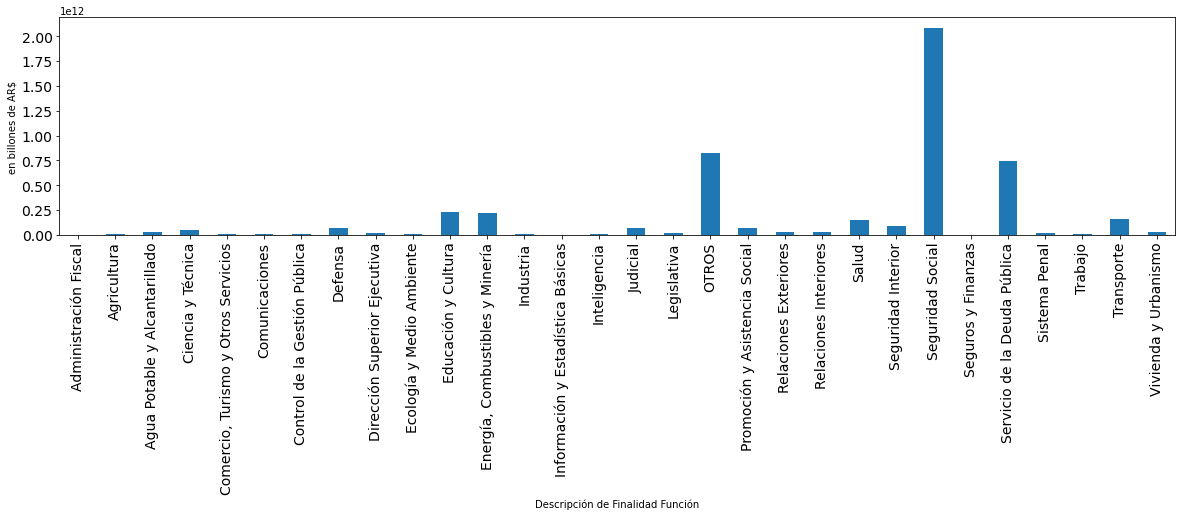

In [21]:
credito_ff_p_2019.plot(kind="bar", figsize=[20,4], fontsize=14, ylabel="en billones de AR$")

**Atención, el total estipulado a través de sumar el crédito de todos los elementos por su código "finalidad función" da un credito total distinto al establecido en [la ley Presupuesto 2019](https://www.economia.gob.ar/onp/documentos/presutexto/proy2019/ley/pdf/proy2019.pdf)**

Debe investigarse otros documentos, o revisar el proceso de extracción de datos.

In [28]:
credito_ff_p_2019.sum()

4994186317695

<AxesSubplot:xlabel='Descripción de Finalidad Función'>

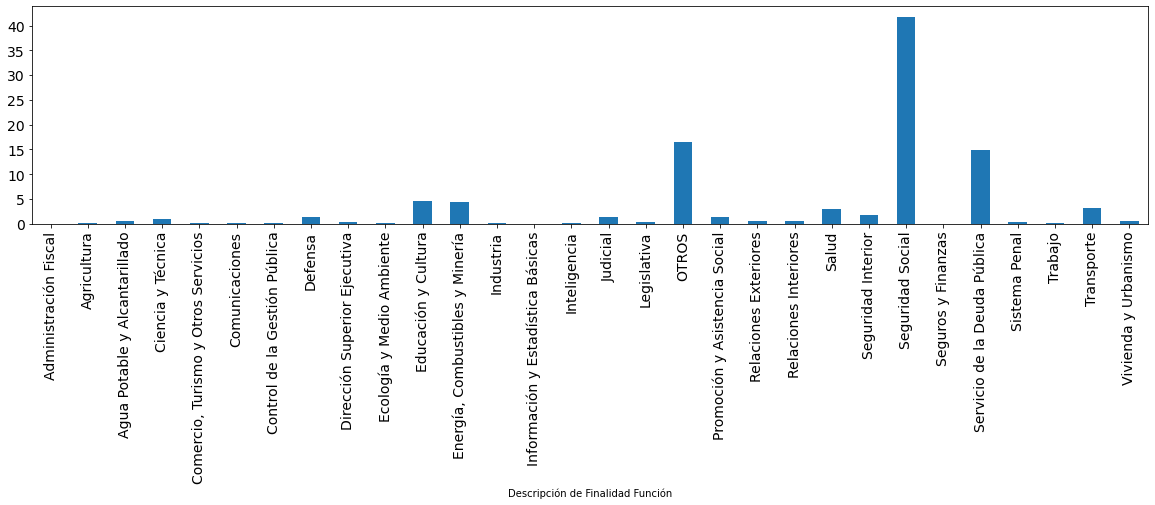

In [23]:
extraerPorcentaje = lambda x: (x/total_credito_2019)*100
porcentajes_credito_ff_p_2019 = credito_ff_p_2019.apply(extraerPorcentaje)
porcentajes_credito_ff_p_2019.plot(kind="bar", figsize=[20,4], fontsize=14)

### Educación y Cultura

Creamos una tabla dónde el código de finalidad funcion sea igual al de "Educación y Cultura". Podemos identificar 17 entradas, cada úna con una jurisdiccion, subjuridiccion, entidad, finalidad-funcion.

In [24]:
codigo_fin_fun_educ_cultura = generarCodigoFinalidadFuncion(desc_educacion_cultura)
pres_educ_cultura = presupuesto_2019[presupuesto_2019["Código de Finalidad Función"]
                                 == float(codigo_fin_fun_educ_cultura)]
pres_educ_cultura.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 3 to 219
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Código de  Jurisdicción           24 non-null     int64  
 1   Descripción de  Jurisdicción      24 non-null     object 
 2   Código de  Subjurisdicción        24 non-null     int64  
 3   Descripción de  Subjurisdicción   24 non-null     object 
 4   Código de  Entidad                24 non-null     int64  
 5   Descripción de  Entidad           24 non-null     object 
 6   Código de Finalidad Función       24 non-null     float64
 7   Descripción de Finalidad Función  24 non-null     object 
 8   Crédito 2019                      24 non-null     int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 1.9+ KB


In [25]:
jurisdicciones_p_ec = pres_educ_cultura.groupby("Descripción de  Jurisdicción")
jurisdicciones_p_ec.size()

Descripción de  Jurisdicción
Jefatura de Gabinete de Ministros                         1
Ministerio de Defensa                                     5
Ministerio de Educación, Cultura, Ciencia y Tecnología    7
Ministerio de Justicia y Derechos Humanos                 2
Ministerio de Seguridad                                   5
Ministerio del Interior, Obras Públicas y Vivienda        1
Obligaciones a Cargo del Tesoro                           1
Poder Legislativo Nacional                                1
Presidencia de la Nación                                  1
dtype: int64

**Creditos totales para educación y cultura 2019**

In [27]:
pres_educ_cultura["Crédito 2019"].sum()

229303637925

#### Ministerio de Educación, Cultura, Ciencia y Tecnología

Sólo viendo la información correspondiente al MECCyT llaman la atención dos cosas de cómo se estructura la información.
1. El código de jurisdicción, subjurisdicción y entidad parece ser independiente, y puede tener elementos repetidos.
    - El MECCyT se encuentra en los trés campos, con tres códigos distintos. Nótese cómo en subjurisdicción aparece con el código 0 y 1, que parecen estar reservados para aquella subjurisdicción que sea idéntica a su jurisdicción, de igual forma con la entidad.
2. La información parece estar ordenada en función de la entidad, no hay entidad que se repita

In [26]:
MECyT = jurisdicciones_p_et.get_group(
    "Ministerio de Educación, Cultura, Ciencia y Tecnología")
# MECyT[[
#     "Descripción de  Subjurisdicción", "Descripción de  Entidad", "Crédito 2019"]]
MECyT


NameError: name 'jurisdicciones_p_et' is not defined

Comprobemos el punto dos, no hay entidad que se repita

In [ ]:
desc_entidad = pres_educ_tec["Descripción de  Entidad"]
desc_entidad

3                             Poder Legislativo Nacional
20                                    Secretaría General
40               Secretaría de Gobierno de Modernización
52     Ministerio del Interior, Obras Públicas y Vivi...
71             Ministerio de Justicia y Derechos Humanos
75                        Servicio Penitenciario Federal
80                               Ministerio de Seguridad
84                             Policía Federal Argentina
88                                  Gendarmería Nacional
92                            Prefectura Naval Argentina
94                    Policía de Seguridad Aeroportuaria
101                                Ministerio de Defensa
107                    Estado Mayor General del Ejército
111                    Estado Mayor General de la Armada
116              Estado Mayor General de la Fuerza Aérea
119         Estado Mayor Conjunto de las Fuerzas Armadas
172                            Teatro Nacional Cervantes
173          Biblioteca Naciona

In [ ]:
desc_entidad.is_unique

True

Veamos el valor total del crédito en la finalidad-funcion de Educación y Cultura